In [ ]:
import pandas as pd
import numpy as np

In [ ]:
df = pd.read_csv("game.csv")

In [ ]:
df_sorted = df.sort_values(by='game_date', ascending=False)
df_sorted = df_sorted[df.team_abbreviation_home != 'LBN']
df_sorted = df_sorted[df.team_abbreviation_home != 'GNS']
df_sorted = df_sorted[df.team_abbreviation_home != 'STP']
df_sorted = df_sorted[df.team_abbreviation_home != 'EST']
df_sorted = df_sorted[df.team_abbreviation_home != 'WST']

teams_list = {'DRT','FCB','RMD','FLA','MLN','FBU','ALB','UBB','NOH','EAM','NJN','BAR','RMA','SEA','CHN','MMT','MAL','LRO','EPT','NOK','MTA','KHI','ROM','LYV','CHH','VAN','SAN','UTH','PHL','GOS'}
for team in teams_list:
  df_sorted = df_sorted[df.team_abbreviation_home != team]

df_sorted = df_sorted.dropna()


In [ ]:
# separate df_sorted into four seasons
seasons = {}
season_yrs = {'2007','2008','2009','2010','2011','2012','2013','2014','2015','2016','2017','2018','2019','2020','2021','2022'}

df_sorted['season_id'] = df_sorted['season_id'] % 10000

for season in season_yrs:
  seasons[season] = df_sorted[df_sorted['season_id'] == int(season)]

In [ ]:
columns_to_delete = ['ft_pct_away','ft_pct_home','ftm_home','ftm_away','fg3a_home','fg3a_away','season_id','team_id_home','team_name_home','game_id','min','video_available_home','video_available_away']

for season in seasons:
  seasons[season].drop(columns=columns_to_delete, inplace=True)

Calculate offensive rating

In [ ]:
for season in seasons:
  # --------HOME--------
  # Calculate Points Produced
  seasons[season]['pts_prod_home'] =  seasons[season]['pts_home'] +  seasons[season]['ast_home'] + (0.5 *  seasons[season]['oreb_home'])

  # Calculate Possessions
  seasons[season]['poss_home'] =  seasons[season]['fga_home'] -  seasons[season]['oreb_home'] +  seasons[season]['tov_home'] + (0.44 *  seasons[season]['fga_home'])

  # Calculate Offensive Rating
  seasons[season]['off_rat_home'] =   (seasons[season]['pts_prod_home'] /  seasons[season]['poss_home']) * 100


  # --------AWAY--------
  # Calculate Points Produced
  seasons[season]['pts_prod_away'] =  seasons[season]['pts_away'] +  seasons[season]['ast_away'] + (0.5 *  seasons[season]['oreb_away'])

  # Calculate Possessions
  seasons[season]['poss_away'] =  seasons[season]['fga_away'] -  seasons[season]['oreb_away'] +  seasons[season]['tov_away'] + (0.44 *  seasons[season]['fga_away'])

  # Calculate Offensive Rating
  seasons[season]['off_rat_away'] =   (seasons[season]['pts_prod_away'] /  seasons[season]['poss_away']) * 100


Calculate defensive rating

In [ ]:
for season in seasons:
  # --------HOME--------
  # Calculate Defensive Rating
  seasons[season]['def_rat_home'] = (seasons[season]['pts_prod_away'] / seasons[season]['poss_away']) * 100

  # Optional: Drop intermediate columns if needed
  seasons[season].drop(columns=['pts_prod_away', 'poss_away'], inplace=True)

  # --------AWAY--------
  # Calculate Defensive Rating
  seasons[season]['def_rat_away'] = (seasons[season]['pts_prod_home'] / seasons[season]['poss_home']) * 100

  # Optional: Drop intermediate columns if needed
  seasons[season].drop(columns=['pts_prod_home', 'poss_home'], inplace=True)


Calculate rebound differential

In [ ]:
for season in seasons:
  # --------HOME--------
  seasons[season]['reb_diff_home'] = seasons[season]['reb_home'] - seasons[season]['reb_away']
  # --------AWAY--------
  seasons[season]['reb_diff_away'] = seasons[season]['reb_away'] - seasons[season]['reb_home']

In [ ]:
# calculate effective fg%

# home
for season in seasons:
  seasons[season]['efg_pct_home'] = (seasons[season]['fgm_home'] + 0.5*(seasons[season]['fg3m_home']))/seasons[season]['fga_home']

# away
for season in seasons:
  seasons[season]['efg_pct_away'] = (seasons[season]['fgm_away'] + 0.5*(seasons[season]['fg3m_away']))/seasons[season]['fga_away']


In [ ]:
# calculate true shooting

# home
for season in seasons:
  seasons[season]['ts_home'] = ((seasons[season]['pts_home'])/(2*((seasons[season]['fga_home']) + 0.44*(seasons[season]['fta_home']))))

# away
for season in seasons:
  seasons[season]['ts_away'] = ((seasons[season]['pts_away'])/(2*(seasons[season]['fga_away'] + 0.44*(seasons[season]['fta_away']))))

Drop unnecessary columns

In [ ]:
drop_columns = ['season_type','fgm_away','fga_away','plus_minus_home','plus_minus_away','team_id_away','pts_home','pf_home','ast_home','stl_home','blk_home','tov_home','fga_home','game_date','fgm_home','oreb_home','dreb_home','oreb_away','dreb_away','reb_home','reb_away','ast_away','stl_away','blk_away','tov_away','pf_away','pts_away']
for season in seasons:
  seasons[season].drop(columns=drop_columns,inplace=True)

In [ ]:
seasons_teams = {}

# make individual dataframes for each team's stats
teams_home = df_sorted['team_abbreviation_home'].unique()
teams_away = df_sorted['team_abbreviation_away'].unique()
teams_dict = {value: None for value in teams_home}

#columns to rename to equalize home and away games
#home_columns = {'ts_home': 'ts','efg_pct_home': 'efg_pct','wl_home': 'wl','team_abbreviation_home': 'team','off_rat_home': 'off_rat','def_rat_home': 'def_rat','fg_pct_home': 'fg_pct','fg3_pct_home': 'fg3_pct','reb_diff_home': 'reb_diff'}
#away_columns = {'ts_away': 'ts','efg_pct_away': 'efg_pct','wl_away': 'wl','team_abbreviation_away': 'team','off_rat_away': 'off_rat','def_rat_away': 'def_rat','fg_pct_away': 'fg_pct','fg3_pct_away': 'fg3_pct','reb_diff_away': 'reb_diff'}

#columns to delete to equalize home and away games
#home_delete = {'ts_away','efg_pct_away','team_abbreviation_away','off_rat_away','def_rat_away','fg_pct_away','fg3_pct_away','reb_diff_away'}
#away_delete = {'ts_home','efg_pct_home','team_abbreviation_home','off_rat_home','def_rat_home','fg_pct_home','fg3_pct_home','reb_diff_home'}

for team in teams_dict:
  for season in seasons:
    name = team + '_' + season
    d = {}
    d['home'] = seasons[season][seasons[season]['team_abbreviation_home'] == team]
    #d['home'].rename(columns=home_columns, inplace=True)
    #d['home'].drop(columns=home_delete, inplace=True)

    #print('home:' + str(len(d['home'].index)))
    d['away'] = seasons[season][seasons[season]['team_abbreviation_away'] == team]
    #d['away'].rename(columns=away_columns, inplace=True)
    #d['away'].drop(columns=away_delete, inplace=True)

    #print('away:' + str(len(d['away'].index)))
    seasons_teams[name] = pd.concat(d)


#print(len(seasons_teams))

# each team's individual stats can be accessed through this dict
#seasons_teams['ATL_2020']

In [ ]:
# calculate expanding mean for each feature statistic

expand_cols = ['ts_home','efg_pct_home','fg_pct_home','fg3_pct_home','off_rat_home', 'def_rat_home', 'reb_diff_home','ts_away','efg_pct_away','fg_pct_away','fg3_pct_away','off_rat_away', 'def_rat_away', 'reb_diff_away']
expanded_teams = {}

for season in seasons_teams:
  expanding_means = seasons_teams[season][expand_cols].expanding().mean()
  for column in expand_cols:
    seasons_teams[season][f'{column}_ex'] = expanding_means[column]
  seasons_teams[season] = seasons_teams[season].drop(columns=['ts_home','efg_pct_home','matchup_home', 'fg_pct_home', 'fg3_pct_home', 'team_name_away', 'matchup_away', 'wl_away', 'fg_pct_away', 'fg3_pct_away', 'off_rat_away', 'off_rat_home', 'def_rat_home', 'def_rat_away', 'reb_diff_home', 'reb_diff_away'])

In [ ]:
# assemble team dfs into one

all_games = pd.concat(seasons_teams)
#all_games

In [ ]:
# scale the data using standard scaler

from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import MinMaxScaler
sc = MinMaxScaler()
all_games[['ts_home','ts_away','efg_pct_home_ex','efg_pct_away_ex','fg_pct_home_ex','fg_pct_away_ex','fg3_pct_home_ex','fg3_pct_away_ex','off_rat_home_ex','off_rat_away_ex','def_rat_home_ex','def_rat_away_ex','reb_diff_home_ex','reb_diff_away_ex']] = sc.fit_transform(all_games[['ts_home_ex','ts_away_ex','efg_pct_home_ex','efg_pct_away_ex','fg_pct_away_ex','fg_pct_home_ex','fg3_pct_away_ex','fg3_pct_home_ex','off_rat_away_ex','off_rat_home_ex','def_rat_home_ex','def_rat_away_ex','reb_diff_home_ex','reb_diff_away_ex']])



In [ ]:
all_games.loc[all_games['wl_home'] == 'W', 'wl'] = 1
all_games.loc[all_games['wl_home'] == 'L', 'wl'] = 0

In [ ]:
# create training and validation sets

from sklearn.model_selection import train_test_split
training_set, validation_set = train_test_split(all_games, test_size = 0.3, random_state = 21)

# classify the predictors and targets

predictors_train = training_set[['ts_home_ex','efg_pct_home_ex','off_rat_home_ex','def_rat_home_ex','reb_diff_home_ex','ts_away_ex','efg_pct_away_ex','off_rat_away_ex','def_rat_away_ex','reb_diff_away_ex']]
targets_train = training_set[['wl_home']]

predictors_test = validation_set[['ts_home_ex','efg_pct_home_ex','off_rat_home_ex','def_rat_home_ex','reb_diff_home_ex','ts_away_ex','efg_pct_away_ex','off_rat_away_ex','def_rat_away_ex','reb_diff_away_ex']]
targets_test = validation_set[['wl_home']]

In [ ]:
def accuracy(confusion_matrix):
   diagonal_sum = confusion_matrix.trace()
   sum_of_all_elements = confusion_matrix.sum()
   return diagonal_sum / sum_of_all_elements

In [ ]:
#Importing MLPClassifier
from sklearn.neural_network import MLPClassifier
from sklearn.preprocessing import LabelEncoder

from sklearn.naive_bayes import GaussianNB

#random forest
from sklearn.ensemble import RandomForestClassifier

from sklearn.linear_model import LogisticRegression


#Initializing the MLPClassifier
classifier = MLPClassifier(hidden_layer_sizes=(150,50,75), max_iter=2000,activation = 'relu',solver='adam',learning_rate='adaptive',learning_rate_init=0.001,random_state=1)
#classifier = RandomForestClassifier()
#classifier = LogisticRegression()
#classifier = GaussianNB()

label_encoder = LabelEncoder()
targets_train = label_encoder.fit_transform(targets_train)
# predictors_train = label_encoder.fit_transform(predictors_train)
targets_test = label_encoder.fit_transform(targets_test)
# predictors_test = label_encoder.fit_transform(predictors_test)


#Fitting the training data to the network
classifier.fit(predictors_train, targets_train)

#Predicting y for X_val
targets_pred = classifier.predict(predictors_test)

/usr/local/lib/python3.10/dist-packages/sklearn/preprocessing/_label.py:116: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.10/dist-packages/sklearn/preprocessing/_label.py:116: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


In [ ]:
#Importing Confusion Matrix
from sklearn.metrics import confusion_matrix
#Comparing the predictions against the actual observations in y_val
cm = confusion_matrix(targets_pred, targets_test)

#Printing the accuracy
print("Accuracy: ", accuracy(cm))

Accuracy:  0.6261280256388632


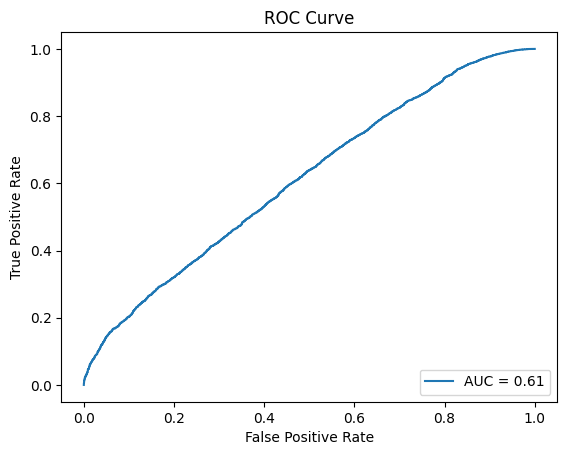

In [ ]:
# generate roc curve
from sklearn import metrics
from sklearn.metrics import roc_curve
import matplotlib.pyplot as plt
fpr, tpr, threshold = roc_curve(targets_test, classifier.predict_proba(predictors_test)[:,1])

roc_auc = metrics.auc(fpr, tpr)
display = metrics.RocCurveDisplay(fpr=fpr, tpr=tpr, roc_auc=roc_auc)
display.plot()

plt.title("ROC Curve")

plt.show()